In [22]:
%matplotlib inline
import json 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
rows =[] 

with open("../data/55_remote_net.json") as the_file:
    rows =  json.load(the_file) # [x.strip() for x in the_file.readlines()]

In [30]:
the_g = BG = nx.Graph() #nx.MultiDiGraph()

In [31]:
nodes = []
edges = {}
edge_ones = []
for x in rows:
    edges[x['sequence_number']] = x
    from_node = "%s-%s" % (x["from_id"],x["from_name"])
    to_node = "%s-%s" % (x["to_id"],x["to_name"])
    nodes.append(from_node)
    nodes.append(to_node)
    edge_ones.append((from_node,to_node,x['sequence_number']))

In [32]:
the_g.add_nodes_from(nodes)
for pick in edge_ones:
    the_g.add_edge( pick[0],pick[1], number=pick[2] )
#     the_g.add_edges_from(edge_ones)



/home/omid/anaconda3/envs/iot_new/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


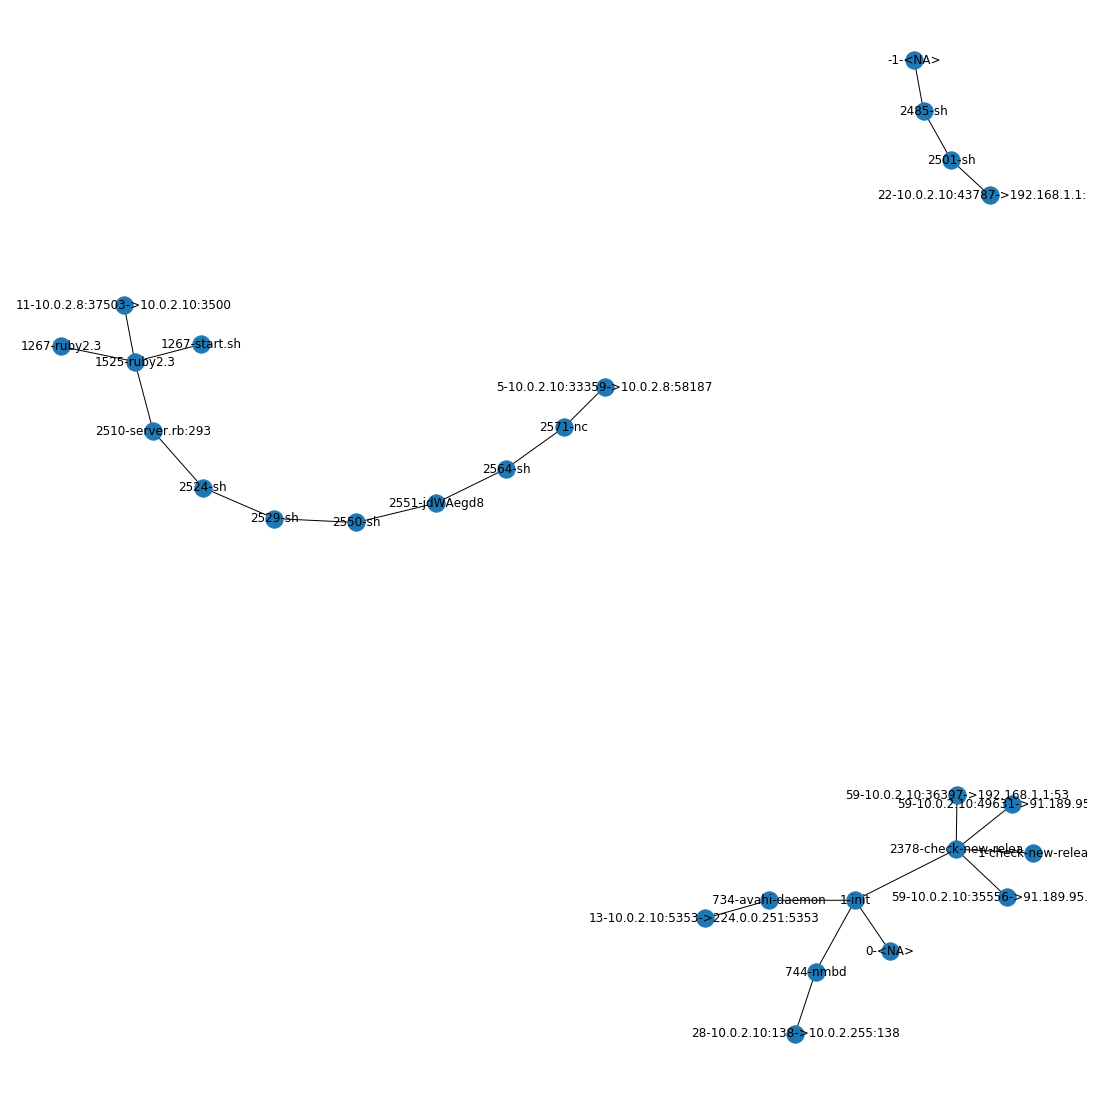

In [51]:
plt.figure(figsize=(15,15))
nx.draw(the_g,with_labels = True)


In [36]:
cmpts = nx.connected_components(the_g)

In [41]:
for x in cmpts:
    print(x)
    

In [52]:
len(the_g.nodes)

27

In [43]:
S = [the_g.subgraph(c).copy() for c in nx.connected_components(the_g)]


In [53]:
for x in S:
    print(len(x.nodes))

11
12
4


In [58]:
data  = []
for pick in S: 
    pick_edges = []
    for x in pick.nodes:
        for edge in edge_ones:
            if edge[0] == x or edge[1] == x :
                pick_edges.append(edge[2])

    data.append(list(set(pick_edges)))
        

In [65]:
cntr= 0 
for pick in data:
    cntr+=1
    with open("../output/%d.json" % cntr , "w") as the_file:
        json.dump([edges[x] for x in pick], the_file)